<a href="https://colab.research.google.com/github/RijuKim/data_analysis/blob/main/graduate_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting admission from important parameters
어떤 사람들이 대학원에 입학할 가능성이 높을까?

---
https://www.kaggle.com/mohansacharya/graduate-admissions

칼럼 정보

* GRE Scores : Graduate Record Examination : 대학원 입학 시 치르는 시험 점수 <BR>
* TOEFL Scores : 토플 점수  <BR>
* University Rating : 대학교 레벨 <BR>
* Statement of Purpose Strength : 학업계획서 점수<BR>
* Letter of Recommendation Strength : 추천서 점수<BR>
* Undergraduate GPA : 대학교 학점<BR>
* Research Experience : 연구 경험 유무<BR>
* Chance of Admit : 대학원 입학 확률<BR>

# 한글 깨짐 미리 방지하기

In [1]:
# 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# 데이터 불러오기


## Kaggle 데이터를 Colab으로 불러오기

In [2]:
# warnin창이 뜨면 무시한다
import warnings
warnings.filterwarnings('ignore') 

In [3]:
# kaggle 파이썬 패키지 설치

!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rijukim","key":"7d732320a9fcf47af0024d355f327f3d"}'}

In [5]:
# kaggle.json 사용가능하도록 설정하는 부분
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# kaggle 데이터 불러오기
# copy API command & paste (쉘 명령어)

!kaggle datasets download -d mohansacharya/graduate-admissions

!unzip '*.zip'

graduate-admissions.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  graduate-admissions.zip
replace Admission_Predict.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: Admission_Predict.csv   
replace Admission_Predict_Ver1.1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: Admission_Predict_Ver1.1.csv  


# Pandas로 데이터 분석하기


## Admission_Predict_Ver1.1.csv 불러오기

In [7]:
# pandas 임포트

import pandas as pd

In [8]:
# csv파일 불러오기

data = pd.read_csv('Admission_Predict_Ver1.1.csv')

## Pandas로 데이터 살펴보기

In [9]:
# 첫 다섯줄 출력하기

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
# 행과 열 수 알아보기

data.shape

(500, 9)

In [11]:
# 데이터 값 요약

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
# 데이터 전반적인 정보

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [13]:
# 컬럼 정보 불러오기

data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
# 빈 값이 있는지 확인하기

data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Review
### Pandas dataframe으로 데이터 접근하기

In [15]:
# 2~4번째 행만 슬라이싱 해서 가져오기

#data.iloc[1:4]
#data.loc[1:3]
data[1:4]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80


In [16]:
# LOR 열만 슬라이싱 해서 가져오기

#data.loc[:,["LOR "]]
data[["LOR "]]

,LOR
0,4.5
1,4.5
2,3.5
3,2.5
4,3.0
...,...
495,4.0
496,5.0
497,5.0
498,5.0


In [17]:
# 맨 첫줄의 SOP 값만 불러오기

data.loc[0:0,["SOP"]]

,SOP
0,4.5


In [18]:
# 첫 두 줄의 토플 점수와 SOP 값을 불러오기

data.loc[0:1, ['TOEFL Score', 'SOP']]

,TOEFL Score,SOP
0,118,4.5
1,107,4.0


In [19]:
# 첫 두줄의 토플점수부터 CGPA까지 불러오기 2번째 열 ~ 6번째 열

data.iloc[0:2,2:7]

,TOEFL Score,University Rating,SOP,LOR,CGPA
0,118,4,4.5,4.5,9.65
1,107,4,4.0,4.5,8.87


## 컬럼 이름 수정하기
* 'Serial No.' : 'No.'
* 'GRE Score' : 'GRE'
* 'TOEFL Score' : 'TOEFL'
* 'University Rating' : 'Univ.'
* 'LOR ' : 'LOR'
* 'Chance of Admit ' : 'Admit'

In [20]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
# 컬럼 이름 수정하기

data.rename(columns = {'Serial No.':'No.','GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'Univ.','LOR ':'LOR','Chance of Admit ':'Admit'}, inplace = True)
data.head()

,No.,GRE,TOEFL,Univ.,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# 데이터 시각화 해보기

##시각화 라이브러리 복습

In [22]:
# matplotlib.pyplot (plt) 임포트
# seaborn (sns) 임포트


import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# 한글 폰트가 깨지지 않도록 폰트 패밀리 지정
plt.rc('font', family='NanumBarunGothic')

## 수치형 데이터 시각화하기
수치형 데이터란 키, 몸무게, 가격, 판매량 등 수치 형태로 측정되는 데이터

### GRE 점수는 대학원 입학에 영향을 줄까?

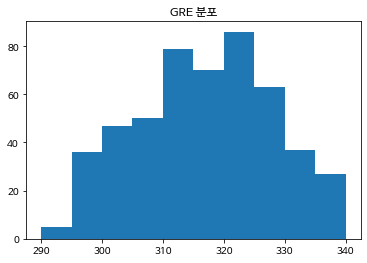

In [24]:
# GRE 분포 히스토그램 그리기

plt.title('GRE 분포')

# data 중 'GRE' 열의 값을 히스토그램으로 그리기

plt.hist(x=data['GRE'])

plt.show()

* GRE - Admit 산점도

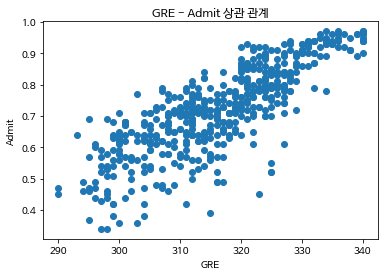

In [29]:
# 타이틀
plt.title('GRE - Admit 상관 관계')

# 산점도 그리기 1번째 방법
#plt.scatter(x = data['GRE'], y = data['Admit'])


# 산점도 그리기 2번째 방법
plt.scatter(x = 'GRE', y = 'Admit', data = data)



# x축 이름
plt.xlabel('GRE')

# y축 이름
plt.ylabel('Admit')

plt.show()

간단 결론 : 입학 가능성에 GRE 영향이 꽤 크게 작용하는 것으로 보임

### 토플 점수는 대학원 입학에 영향을 줄까?
토플 점수 분포 확인 (막대 그래프, 곡선 그래프)

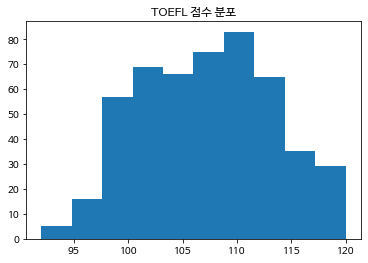

In [30]:
plt.title('TOEFL 점수 분포')
plt.hist(x = data['TOEFL'])
plt.show()

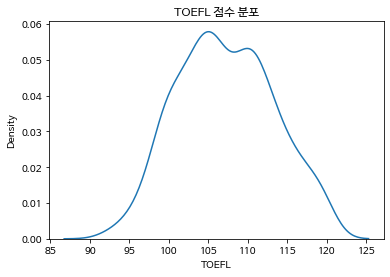

In [31]:
# seaborn의 kdeplot을 사용해보자 (x축과 y축 이름도 자동으로 보여준다)

plt.title('TOEFL 점수 분포')

# TOEFL 분포를 kdeplot으로 그려보기

sns.kdeplot(x='TOEFL', data=data)

plt.show()

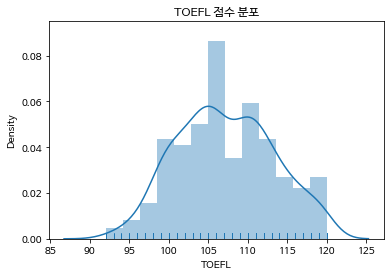

In [33]:
# seaborn의 distplot을 사용해보자 (여러 옵션들)

plt.title('TOEFL 점수 분포')
sns.distplot(data['TOEFL'], hist=True, kde=True, rug = True)
plt.show()

* 토플 점수 - Admit 산점도

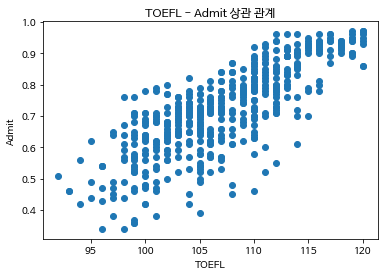

In [34]:
# 타이틀
plt.title('TOEFL - Admit 상관 관계')

# 산점도 그리기
plt.scatter(x='TOEFL', y='Admit', data=data)


# x축 이름
plt.xlabel('TOEFL')

# y축 이름
plt.ylabel('Admit')

plt.show()


간단 결론 : 큰 흐름은 있으나, 토플 점수 115점 아래에서는 예외 값도 많이 보임

### 미션 7
#### 대학교 학점은 대학원 입학에 영향을 줄까?
CGPA 점수 분포

In [ ]:
# 타이틀
plt.title('CGPA 점수 분포')

# distplot 그래프 그리기


plt.show()

In [ ]:
# 타이틀
plt.title('CGPA - Admit 상관 관계')

# 산점도 그리기


# x축 이름
plt.xlabel('CGPA')

# y축 이름
plt.ylabel('Admit')

plt.show()

In [ ]:
# 타이틀
plt.title('CGPA - Admit 상관 관계')

# 산점도와 직선 함께 그리기 (regplot)


# x축 이름
plt.xlabel('CGPA')

# y축 이름
plt.ylabel('Admit')

plt.show()

간단 결론 : 대학교 학점은 대학원 입학과 관계가 있다.

## 범주형 데이터 시각화하기
혈액형, 색깔, 성별 등과 같이 몇 개의 범주로 구분되는 데이터


### 대학교 레벨은 대학원 입학에 영향을 줄까?

In [ ]:
# 범주형 데이터 rugplot 그려보기

plt.title('Univ.분포')

# 대학교 레벨의 범주를 rugplot으로 확인하기


plt.show()

아무것도 없는 것 같지만.. 데이터의 위치를 x축 위에 작은 선분으로 보여준다. <br>
그런데, Y축 마이너스 표기가 보이지 않는다. 아래 코드를 통해 해결해준다.

In [ ]:
# 마이너스 표기 깨짐 현상 해결
plt.rc('axes', unicode_minus = False)

In [ ]:
# distplot으로 범주형 데이터 표기하기
plt.title('Univ.분포')

sns.________(x = data['Univ.'], hist = True, kde = True, rug = True) # 옵션 값을 바꿔보자

plt.show()

In [ ]:
# countplot으로 범주형 데이터의 개수 알아보기
plt.title('Univ. 분포')

sns.__________(x = data['Univ.'])

plt.show()

In [ ]:
# boxplot으로 범주형 데이터의 분포 알아보기

plt.title('Univ. - Admin 상관 관계')

sns._______(x = 'Univ.', y = 'Admit', data=data)

plt.show()

데이터가 많이 모여있는 곳은 박스로, 조금 모여 있는 곳은 선으로, 특이값은 점으로 표현됨 <br><br>
간단 결론 : 대학원 레벨이 높을 수록 입학 가능성이 높아지는 추이를 보임

### 학업 계획서 점수는 대학원 입학에 영향을 줄까?

In [ ]:
# countplot으로 범주형 데이터의 개수 알아보기
plt.title('SOP count')

sns.________(x = data[' '])

plt.show()

In [ ]:
# boxplot으로 범주형 데이터의 상관관계 알아보기
plt.title('SOP - Admin 상관 관계')

sns._____(x = ' ', y = ' ', data=data)

plt.show()

In [ ]:
# barplot으로 범주형 데이터의 상관관계 알아보기
plt.title('SOP - Admin 상관 관계')

sns._______(x = 'SOP', y = 'Admit', data=data)

plt.show()

막대그래프의 높이는 평균 값이며, 굵은 검정색 세로 선은 평균에서부터 데이터 편차를 의미함 <br>
검정선이 길수록 SOP값별로 평균값 기준으로 데이터의 편차가 크다는 뜻 <br><br>
간단 결론 : 지원서 서류 점수 1.5점 이하일 때는 큰 영향이 없으며 2.0점 이상일 때는 높을 수록 대학원 입학 가능성이 높아짐

### 미션 8
#### 추천서 점수는 대학원 입학에 영향을 줄까?

In [ ]:
# LOR 분포를 나타내보자





In [ ]:
# LOR - Admit 상관 관계를 나타내보자





간단 결론 : 추천서 점수가 높을 수록 대학원 입학 확률이 점차 높아진다.

##### boxplot의 단점을 보완해주는 violinplot을 그려보자!

In [ ]:
# violinplot으로 알아보는 LOR - Admit 상관 관계
plt.title('LOR - Admin 상관 관계')
_________(x = 'LOR', y = 'Admit', data=data)
plt.show()

In [ ]:
# violinplot으로 알아보는 Research - Admit 상관 관계
plt.title('Research - Admin 상관 관계')
_________(x = 'Research', y = 'Admit', data=data)
plt.show()

##### violinplot에서 면이 아닌 점으로 분포를 알아보는 swarmplot이라는 그래프 유형

In [ ]:
# swarmplot으로 알아보는 Research - Admit 상관 관계
plt.title('Research - Admin 상관 관계')
_________(x = 'Research', y = 'Admit', data=data)
plt.show()

## 데이터 상관관계 확인하기

In [ ]:
# heatmap


# seaborn의 heatmap 메서드 (각 feature 간의 상관관계를 보여주고, 숫자도 함께 보여준다.)


# 그래프 띄우기



In [ ]:
# pairplot





## 간단한 인사이트를 도출해보자
* 각 feature별 상관관계 그래프를 다시 소화해본다.
* heatmap을 그려 한눈에 상관관계를 숫자로 확인한다.
* 간단한 결론을 몇 가지 적어본다.


# 데이터 전처리

## CGPA 데이터 이상치 제거하기

In [ ]:
# 2 sigma 이상치 제거 함수 정의
def remove_outliers_sigma(df, column_name):
  # 평균값 +- 표준편자 * 2
  lower = df[column_name]._______ - (df[column_name]._____*2)
  upper = df[column_name]._______ + (df[column_name]._____*2)

  # min ~ max 안에 포함되는 데이터만 저장
  removed_outliers = df[column_name].between(lower, upper)

  # 기존 데이터 사이즈와 이상치 제거 후 데이터 사이즈 비교
  bf  = df[column_name].size
  print(str(df[column_name][removed_outliers].size) + "/" + str(bf) + " data points remain.") 
  
  # 전체 데이터에서 이상치에 해당하는 값만 임시저장
  index_names = df[~removed_outliers].index 

  # 이상치 인덱스를 제거한 데이터프레임 반환
  return df.drop(index_names)

In [ ]:
# IQR 이상치 제거 함수 정의
# 0.25, 0.75를 입력하여 사용할 예정 

def remove_outliers_iqr15(df,column_name,lower,upper):
    iqr = abs(df[column_name].__________(lower) - df[column_name]._______(upper))

    # print(f"max = {df[column_name].quantile(upper) + iqr*1.5}")
    # print(f"min = {df[column_name].quantile(lower) - iqr*1.5}")
    removed_outliers = df[column_name].between(df[column_name].quantile(lower) - iqr*1.5, df[column_name].quantile(upper) + iqr*1.5)
    bf  = df[column_name].size
    
    print(str(df[column_name][removed_outliers].size) + "/" + str(bf) + " data points remain.") 
    index_names = df[~removed_outliers].index 
    return df.drop(index_names)

In [ ]:
# 2 sigma 이상치 제거 함수 호출
sigma_data = _______________(data, 'CGPA')


# IQR 이상치 제거 함수 호출
iqr15_data = _______________(data,'CGPA', 0.25, 0.75)

* 왜 iqr 이상치 제거가 잘 되지 않았을까??

In [ ]:
# 정의해주었던 함수에서 max값과 min값을 출력해주는 코드를 추가하고
# 다시 함수를 호출해본 다음 데이터 값 자체의 최대, 최소 값과 비교해보자

iqr15_data = remove_outliers_iqr15(data,'CGPA', 0.25, 0.75)

In [ ]:
data.describe()

* 모든 데이터가 정상 범위 안에 들어온 것이다. <br>
지금은 데이터 셋 크기 자체가 작으므로 이상치를 제거하지 않는 것이 더 좋다. <br>
나중에 1만개 이상의 더 크고 무거운 데이터를 다루게 된다면 그 때 위 방법을 활용하도록 하자.

## 미션 9
#### TOEFL 데이터 이상치 제거하기
* 2Sigma
* IQR x 1.5 <BR>
TOEFL 이상치 제거하여, 이상치 제거 전/후 TOEFL 데이터 분포 차이 확인하기



In [ ]:
# 2Sigma
toefl_sigma = 

In [ ]:
# IQR x 1.5
toefl_iqr15 = 

In [ ]:
# 타이틀 - TOEFL 이상치 제거 전 점수 분포
plt.title('TOEFL 이상치 제거 전 점수 분포')

# kdeplot 그래프


# 그래프 출력
plt.show()

In [ ]:
# 타이틀 - TOEFL Sigma 이상치 제거 후 점수 분포
plt.title('TOEFL Sigma 이상치 제거 후 점수 분포')

# kdeplot 그래프


# 그래프 출력
plt.show()

In [ ]:
# 타이틀 - TOEFL IQR x 1.5 이상치 제거 후 점수 분포
plt.title('TOEFL IQR x 1.5 이상치 제거 후 점수 분포')

# kdeplot 그래프


# 그래프 출력
plt.show()

## Feature Selection

8개의 feature 중 무엇을 남기고, 무엇을 삭제해야 할까?
* No. GRE TOEFL Univ. SOP LOR CGPA Research // Admit

### Serial No. 열 삭제하기

In [ ]:
# Serial No. 열 삭제하기
edited = data.______(columns = ['No.'])
edited.head()

In [ ]:
# 원본데이터 확인해보기
data.head()

In [ ]:
# 원본 데이터에서 바로 삭제하기
data.drop(columns = ['No.'], inplace = )
data.head()

## 숫자 데이터 표준화하기

In [ ]:
# 숫자 데이터를 표준화 하기 전 임시로 분리

feature_num = ['GRE', 'TOEFL', 'Univ.', 'SOP', 'LOR', 'CGPA']
feature = ['Research']

In [ ]:
from sklearn.preprocessing import StandardScaler
# feature의 값들이 표준정규분포가 되도록 평균이 0 표준편차가 1이 되도록 변환해준다

# scaler 생성
scaler = 

scaler._____(data[feature_num]) # 스케일러에게 표준화해야하는 데이터가 무엇인지 알려줌

X_num = scaler.________(data[feature_num]) # 정규분포로 변환한 데이터를 반환해서 새 변수에 저장

# X_num은 리스트이므로 데이터프레임 형태로 변환
X_num = pd.DataFrame(data = X_num, index = data[feature_num].index, columns = data[feature_num].columns)

# Research 다시 합치기
X = pd.concat([X_num, data[feature]], axis = 1) # axis =1 이니까 행이 아닌, 열로 이어붙인다.

# 예측해야 하는 데이터는 따로 저장
Y = data['Admit']

In [ ]:
X.head()

## 카테고리 데이터 dummy 처리하기 (One-hot-encoding)


In [ ]:
# 만약, A B C D E 와 같은 문자열 데이터가 있다면 머신러닝이 학습 할 수 있도록 변환해야 함

feature_category = ['Research']

# dummy 처리하기
X_category = pd.__________(data[feature_category], columns = feature_category)

X_category.head()

여기까지 이해 되셨나요?<br>
잠시 PPT로 돌아가서 이론을 살펴보고 돌아옵시다 !

# 모델링과 결과 예측하기

## 학습 데이터와 테스트 데이터 분리하기

In [ ]:
from sklearn.model_selection import train_test_split

# train / test 데이터 분리
train_X, test_X, train_Y, test_Y = 


# test와 train 용으로 나눠야 하는 데이터 X와 Y를 매개변수로 넣어주고
# 데이터를 7:3으로 나눠주고
# 데이터를 test와 train으로 나누기 전에 랜덤하게 섞어줄 것인지 여부 (일부 구간에 특정한 값이 몰려있지 않도록)
# 셔플은 되지만, 동일하게 셔플되도록 random_state = 1

## Linear Regression 으로 예측하기

In [ ]:
from sklearn.linear_model import LinearRegression

# 모델 생성
linear_model = 

# 모델 학습 (X와 Y를 모두 주는 지도학습)
linear_model.

# 모델로 예측하기 (얼마나 학습이 잘 되었나 확인해보자)
# 예측에 필요한 feature만 넣어줌
linear_predict_y = 


### RandomForest Regression 으로 예측하기

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = 

# 모델 학습
randomforest_model.

# 모델로 예측하기
randomforest_predict_y = 

### 오차 측정하기

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
# Linear Regression의 오차 측정
print("Linear Regression Error")
mae = _______________(test_Y, linear_predict_y)
rmse = ____(____________(test_Y, linear_predict_y))
print(f"MAE : {mae}")
print(f"RMSE : {rmse}")

In [ ]:
# Random Forest Regression의 오차 측정
print("Random Forest Regression Error")
mae = _______________(test_Y, randomforest_predict_y)
rmse = ____(____________(test_Y, randomforest_predict_y))
print(f"MAE : {mae}")
print(f"RMSE : {rmse}")

Linear Regression의 예측이 조금 더 정확했다.

### 어떤 Feature를 중요하게 생각했을까?

In [ ]:
# Linear Regression 중요도 (Feature별 가중치)
plt.title("Linear Regression 중요도")
plt.bar(train_X.columns, linear_model._______)
plt.show()

In [ ]:
# Random Forest Regression 중요도 (Feature별 가중치)
plt.title("Random Forest Regression 중요도")
plt.bar(train_X.columns, randomforest_model.____________)
plt.show()

간단 결론 : 대학원 입학 확률을 예측하는데 가장 큰 영향을 미치는 요소는 '대학교 학점' <br>
단 여러 모델을 가지고 예측을 했을 때 각 모델에서 feature에 반영하는 중요도는 다를 수 있다.

# 따라치며 이해하는 딥러닝 기초

In [ ]:
# Tensorflow, Numpy 임포트


In [ ]:
# X, Y 리스트 변수 선언

deep_Y = 
deep_X = 

In [ ]:
# 데이터 행렬 만들기 (for문)




In [ ]:
# 모델 생성

deep_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='tanh'),



])



* keras는 sequential 함수를 제공. 층을 차례대로 쌓은 모델
* 512개의 유닛을 가진 입력 layer. activation은 층의 활성화함수(의사결정 함수)를 설정하는 매개변수. 'tanh'는 대표적인 함수 중 하나
* 최종적으로 하나의 노드로 모아지기 때문에 마지막 유닛은 1개, 0~1까지의 확률이기 때문에 활성화 함수로 'sigmoid'




In [ ]:
# 모델 컴파일

deep_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

* 훈련과정 : 이 함수를 최적화하는 방향으로 학습이 일어나는 대표적인 함수 중 하나인 adam을 사용

* 손실함수 : 손실함수를 최소화하는 방향으로 알아서 가중치(w)와 역치(k)를 수정함. 즉, 모델 학습에 재사용됨. 여기서는 mse(mean squared error)를 사용해보자.

* 측정함수 : 에포크가 한번 끝날 때마다 모델의 성능을 평가함. 검증데이터로 쓸 데이터를 지정한다. 여기서는 mae를 사용

---

* 에포크 = 500 은 전체 입력 데이터를 500번 순회한다는 것을 의미

In [ ]:
# 학습 수행

deep_model.fit(np.array(deep_X), np.array(deep_Y), epochs=50)  # 넘파이 배열로 전환해서 전달



---



---



# 최종 미션

## 데이터 분석 보고서 제출하기
지난 주부터 지금까지 배운 라이브러리를 활용하여 나만의 데이터 분석 보고서를 만들어봅시다. 
트위터 API로 스크래핑을 해도 좋고, 대학원 입학 데이터를 활용해도 좋고, Kaggle에 있는 다른 데이터를 활용해서 도전해본다면 더욱 좋습니다.

•상상력을 동원해서 재미있는 인사이트를 뽑아내주세요!

•파일은 ipynb 형태로 작성해주시고 아래 링크로 제출해주세요.

---

- 제출 링크 : https://forms.gle/PVqNsEe7vN3zkhLcA
- 제출 마감 : 8/31(수) 